In [15]:
import json
# remove this import at some point
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size']   = 12

In [16]:
PlotSize = (10, 10)

In [17]:
def numpyfy_dict(d):
    for k in d:
        d[k] = np.array(d[k])
    return d

def numpyfy_dict_of_dicts(d):
    for k in d:
        d[k] = numpyfy_dict(d[k])
    return d

In [24]:
# load the data for constant lambda, lambda error and lambda loss

lambda_ = 0.01 # ou lambda = 0.0001 ou 1.0

const_lambda_input_files = {
    "bootstrap_bootstrap"     :f"data/ridge/ridge_bootstrap_bootstrap_overlaps_lambda={lambda_}.json",
    "bootstrap_full"          :f"data/ridge/ridge_bootstrap_full_overlaps_lambda={lambda_}.json",
    "full_full"               :f"data/ridge/ridge_full_full_overlaps_lambda={lambda_}.json",
    "y_resampling"            :f"data/ridge/ridge_label_label_overlaps_lambda={lambda_}.json",
    "residual_bootstrap"      :f"data/ridge/ridge_residual_residual_overlaps_lambda={lambda_}.json",
    
    "subsampling_subsampling" : f"data/ridge/ridge_subsampling_subsampling_overlaps_lambda={lambda_}_p=0.99.json",
    "subsampling_full"        : f"data/ridge/ridge_subsampling_full_overlaps_lambda={lambda_}_p=0.99.json",

    "subsampling_subsampling_2" : f"data/ridge/ridge_subsampling_subsampling_overlaps_lambda={lambda_}_p=0.8.json",
    "subsampling_full_2"        : f"data/ridge/ridge_subsampling_full_overlaps_lambda={lambda_}_p=0.8.json",

    "bayes_optimal" :           f"data/ridge/ridge_bayes_optimal_overlaps.json"
}

const_lambda_overlaps = { key : json.load(open(const_lambda_input_files[key], "r")) for key in const_lambda_input_files }
const_lambda_alpha_range  = const_lambda_overlaps["full_full"]["alpha"]

const_lambda_overlaps = numpyfy_dict_of_dicts(const_lambda_overlaps)
p = const_lambda_overlaps["subsampling_subsampling"]["proba"] # 0.99
p_2 = const_lambda_overlaps["subsampling_subsampling_2"]["proba"] # 0.8

In [25]:
# load experimental data froim the files

exp_files = {
    "pair_bootstrap" : f"data/ridge/exp_ridge_bias_variance_pair_bootstrap_lambda={lambda_}.json",
    "subsampling_08" : f"data/ridge/exp_ridge_bias_variance_subsampling_08_lambda={lambda_}.json",
    "subsampling_099" : f"data/ridge/exp_ridge_bias_variance_subsampling_099_lambda={lambda_}.json",
    "full_resampling" : f"data/ridge/exp_ridge_bias_variance_full_resampling_lambda={lambda_}.json",
    "label_resampling" : f"data/ridge/exp_ridge_bias_variance_label_resampling_lambda={lambda_}.json",
    "residual_bootstrap" : f"data/ridge/exp_ridge_bias_variance_residual_bootstrap_lambda={lambda_}.json",
}

exp_data = { key : json.load(open(exp_files[key], "r")) for key in exp_files }

In [26]:

# store the bias of erm in full_full as we need these overlaps toc compute the bias
true_bias            = 1.0 + const_lambda_overlaps["full_full"]["q_off_diag"] - 2 * const_lambda_overlaps["full_full"]["m"]
conditional_bias     = 1.0 + const_lambda_overlaps["y_resampling"]["q_off_diag"] - 2 * const_lambda_overlaps["y_resampling"]["m"]

hat_bias_pair_bootstrap     = const_lambda_overlaps["full_full"]["q_diag"] + const_lambda_overlaps["bootstrap_bootstrap"]["q_off_diag"] - 2 * const_lambda_overlaps["bootstrap_full"]["q_off_diag"]
hat_bias_residual_bootstrap = const_lambda_overlaps["full_full"]["q_diag"] + const_lambda_overlaps["residual_bootstrap"]["q_off_diag"] - 2 * const_lambda_overlaps["residual_bootstrap"]["m"]
hat_bias_subsampling = const_lambda_overlaps["full_full"]["q_diag"] + const_lambda_overlaps["subsampling_subsampling"]["q_off_diag"] - 2 * const_lambda_overlaps["subsampling_full"]["q_off_diag"]
# hat_bias_subsampling /= (1.0 - p)**2

hat_bias_subsampling_2 = const_lambda_overlaps["full_full"]["q_diag"] + const_lambda_overlaps["subsampling_subsampling_2"]["q_off_diag"] - 2 * const_lambda_overlaps["subsampling_full_2"]["q_off_diag"]
# hat_bias_subsampling_2 /= (1.0 - p_2)**2

# 
true_var = const_lambda_overlaps["full_full"]["q_diag"] - const_lambda_overlaps["full_full"]["q_off_diag"]
conditional_var = const_lambda_overlaps["y_resampling"]["q_diag"] - const_lambda_overlaps["y_resampling"]["q_off_diag"]
var_bayes_optimal = 1.0 - const_lambda_overlaps["bayes_optimal"]["q"]
hat_var_pair_bootstrap = const_lambda_overlaps["bootstrap_bootstrap"]["q_diag"] - const_lambda_overlaps["bootstrap_bootstrap"]["q_off_diag"]
hat_var_residual_bootstrap = const_lambda_overlaps["residual_bootstrap"]["q_diag"] - const_lambda_overlaps["residual_bootstrap"]["q_off_diag"]
hat_var_subsampling = const_lambda_overlaps["subsampling_subsampling"]["q_diag"] - const_lambda_overlaps["subsampling_subsampling"]["q_off_diag"]
hat_var_subsampling_2 = const_lambda_overlaps["subsampling_subsampling_2"]["q_diag"] - const_lambda_overlaps["subsampling_subsampling_2"]["q_off_diag"]

# 

hat_bias_pair_bootstrap_finite_size = hat_bias_pair_bootstrap + hat_var_pair_bootstrap / exp_data["pair_bootstrap"]["K"] 
hat_bias_residual_bootstrap_finite_size = hat_bias_residual_bootstrap + hat_var_residual_bootstrap / exp_data["residual_bootstrap"]["K"]
hat_bias_subsampling_finite_size = hat_bias_subsampling + ( hat_var_subsampling / (exp_data["subsampling_099"]["K"] - 1) ) #/ (1.0 - p)
hat_bias_subsampling_2_finite_size = hat_bias_subsampling_2 + ( hat_var_subsampling_2 / (exp_data["subsampling_08"]["K"] - 1) ) #/ (1.0 - p_2)

---

# Plotting the bias and variance

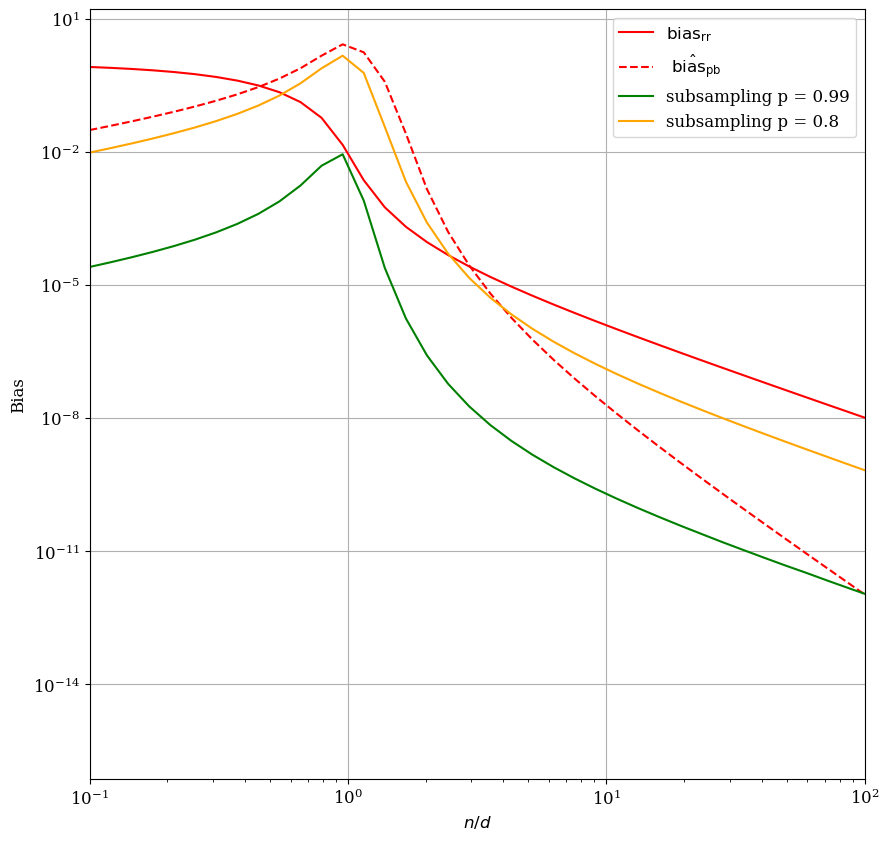

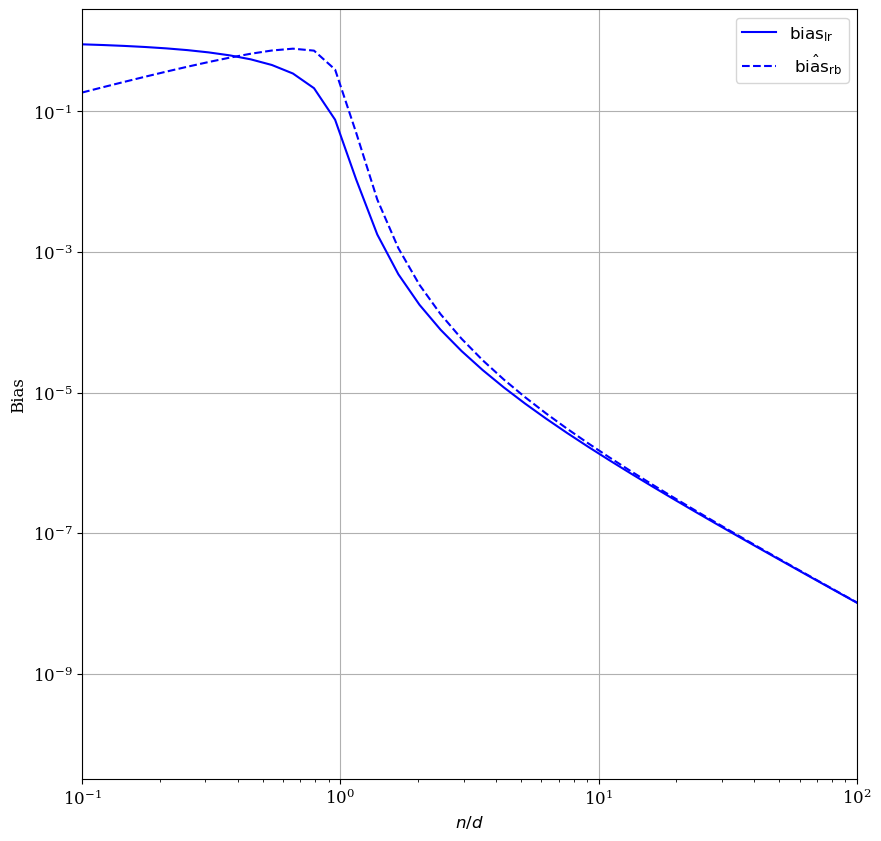

In [66]:
# BIAS OF ERM AND ITS ESTIMATION BY BOOTSTRAP

plt.figure(figsize = PlotSize)

plt.loglog(const_lambda_alpha_range, true_bias, label="${\\rm bias}_{\\rm rr}$", c='r')
plt.loglog(const_lambda_alpha_range, hat_bias_pair_bootstrap , label=" $ \\hat{\\rm bias}_{\\rm pb}$", c='r', linestyle='--')
plt.loglog(const_lambda_alpha_range, hat_bias_subsampling, label=f"subsampling p = {p}", c='g')
plt.loglog(const_lambda_alpha_range, hat_bias_subsampling_2, label=f"subsampling p = {p_2}", c='orange')

plt.grid()
plt.legend()

plt.xlim( min(const_lambda_alpha_range), 1e2)
plt.xlabel("$n / d$")
plt.ylabel("Bias")

plt.show()

plt.figure(figsize = PlotSize)

plt.loglog(const_lambda_alpha_range, conditional_bias, label="${\\rm bias}_{\\rm lr}$", c='b')
plt.loglog(const_lambda_alpha_range, hat_bias_residual_bootstrap, label=" $ \\hat{\\rm bias}_{\\rm rb}$", c='b', linestyle='--')

plt.xlim( min(const_lambda_alpha_range), 1e2)
plt.xlabel("$n / d$")
plt.ylabel("Bias")

plt.grid()
plt.legend()

plt.show()

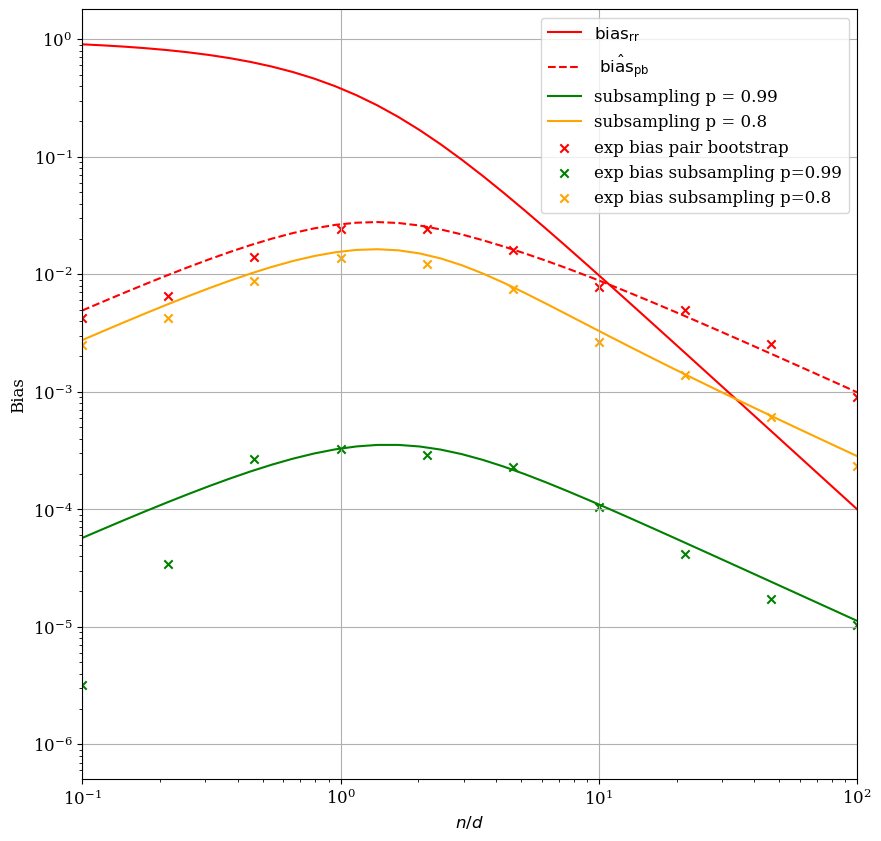

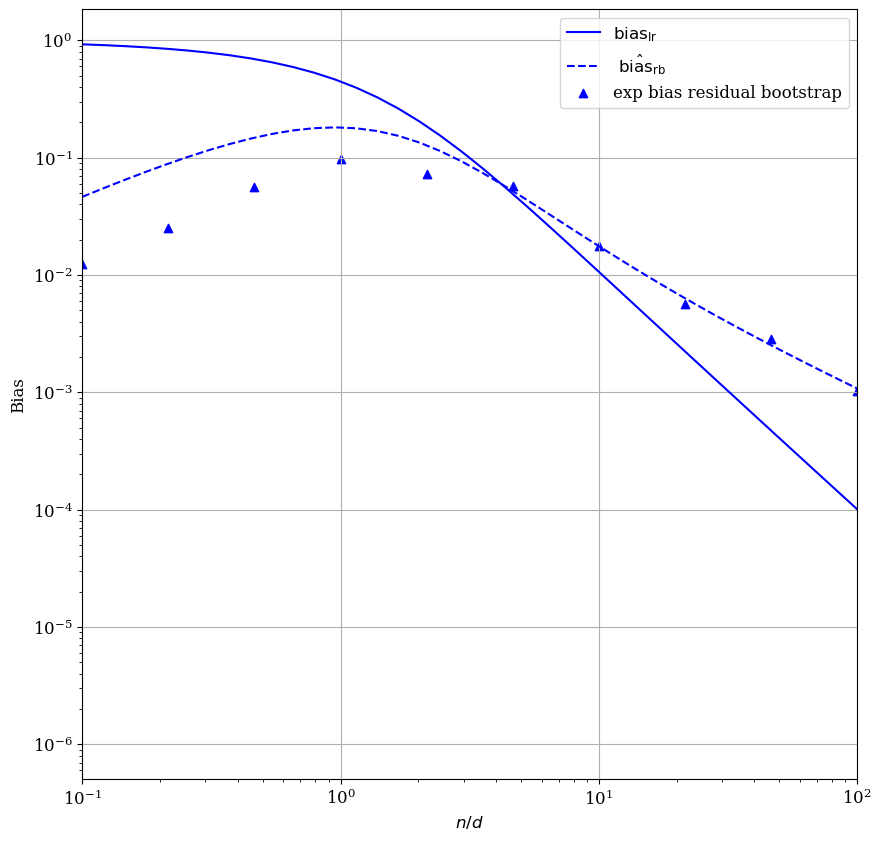

In [58]:
# THEORETICAL PREDICTION AND EMPIRICAL VALUE OF THE BIAS AT FINITE BOOTSTRAP RESAMPLES SIZE


plt.figure(figsize = PlotSize)

plt.loglog(const_lambda_alpha_range, true_bias, label="${\\rm bias}_{\\rm rr}$", c='r')
plt.loglog(const_lambda_alpha_range, hat_bias_pair_bootstrap_finite_size, label=" $ \\hat{\\rm bias}_{\\rm pb}$", c='r', linestyle='--')
plt.loglog(const_lambda_alpha_range, hat_bias_subsampling_finite_size, label=f"subsampling p = {p}", c='g')
plt.loglog(const_lambda_alpha_range, hat_bias_subsampling_2_finite_size, label=f"subsampling p = {p_2}", c='orange')

plt.scatter(exp_data["pair_bootstrap"]["alpha"] , np.array(exp_data["pair_bootstrap"]["bias"]) , label="exp bias pair bootstrap", c='r', marker ='x')
plt.scatter(exp_data["subsampling_099"]["alpha"], np.array(exp_data["subsampling_099"]["bias"]), label="exp bias subsampling p=0.99", c='g', marker='x')
plt.scatter(exp_data["subsampling_08"]["alpha"] , np.array(exp_data["subsampling_08"]["bias"]), label="exp bias subsampling p=0.8", c='orange', marker='x')

plt.grid()
plt.legend()

plt.xlim( min(const_lambda_alpha_range), 1e2)
plt.xlabel("$n / d$")
plt.ylabel("Bias")

plt.show()

plt.figure(figsize = PlotSize)

plt.loglog(const_lambda_alpha_range, conditional_bias, label="${\\rm bias}_{\\rm lr}$", c='b')
plt.loglog(const_lambda_alpha_range, hat_bias_residual_bootstrap_finite_size, label=" $ \\hat{\\rm bias}_{\\rm rb}$", c='b', linestyle='--')
 
plt.scatter(exp_data["residual_bootstrap"]["alpha"], np.array(exp_data["residual_bootstrap"]["bias"]), label="exp bias residual bootstrap", c='b', marker='^')

plt.xlim( min(const_lambda_alpha_range), 1e2)
plt.xlabel("$n / d$")
plt.ylabel("Bias")

plt.grid()
plt.legend()

plt.show()

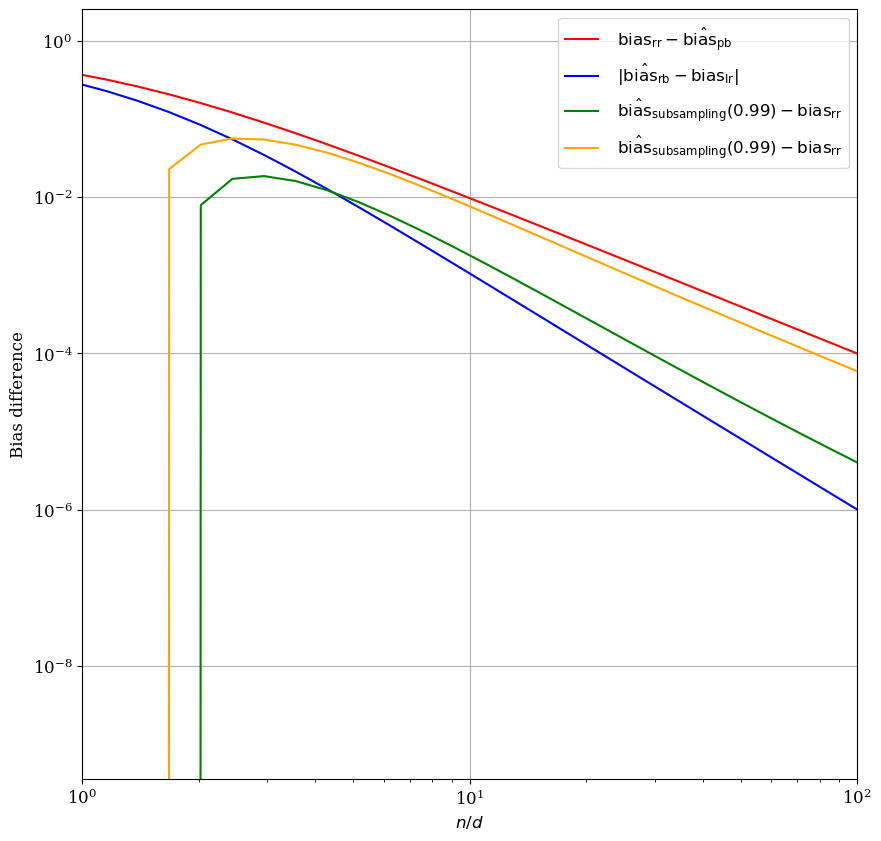

In [53]:
# plot the different between the biases

plt.figure(figsize = PlotSize)

plt.loglog(const_lambda_alpha_range, true_bias - hat_bias_pair_bootstrap, label=" ${\\rm bias}_{\\rm rr} - \\hat{\\rm bias}_{\\rm pb} $", c='r')
plt.loglog(const_lambda_alpha_range, conditional_bias - hat_bias_residual_bootstrap, label=" $ | \\hat{\\rm bias}_{\\rm rb} - {\\rm bias}_{\\rm lr} |$", c='b')
plt.loglog(const_lambda_alpha_range, hat_bias_subsampling - true_bias, label=" $ \\hat{\\rm bias}_{\\rm subsampling}(0.99) - {\\rm bias}_{\\rm rr}$"  , c='g')
plt.loglog(const_lambda_alpha_range, hat_bias_subsampling_2 - true_bias, label=" $ \\hat{\\rm bias}_{\\rm subsampling}(0.99) - {\\rm bias}_{\\rm rr}$", c='orange')

plt.xlabel("$n / d$")
plt.ylabel("Bias difference")

plt.xlim( 1.0, 1e2)
plt.grid()
plt.legend()

plt.show()

# Variances

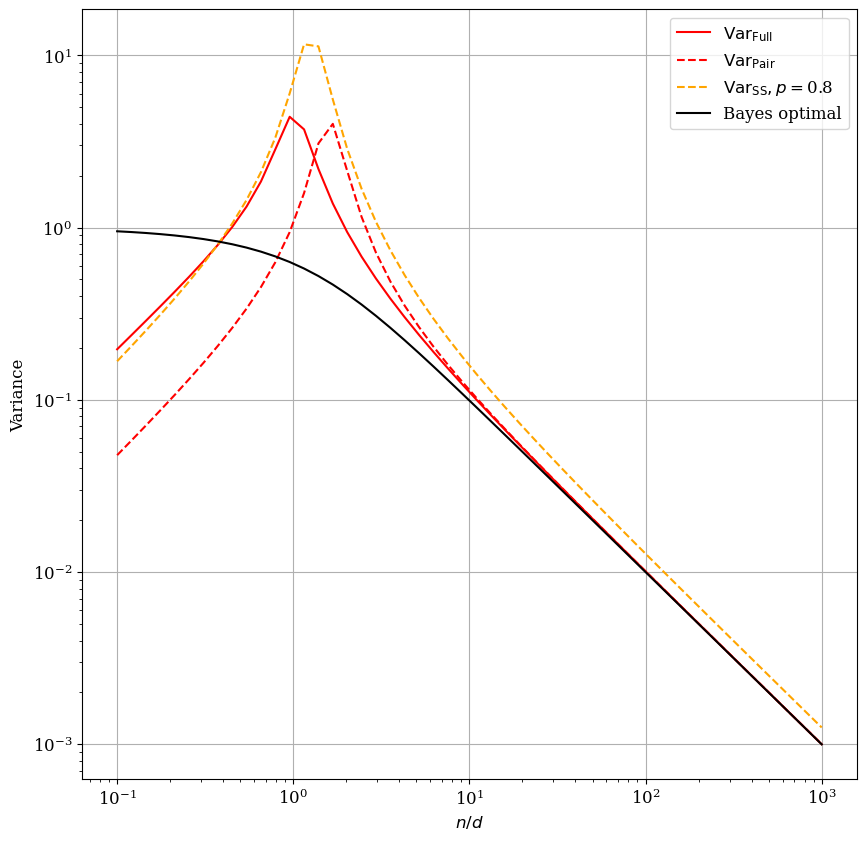

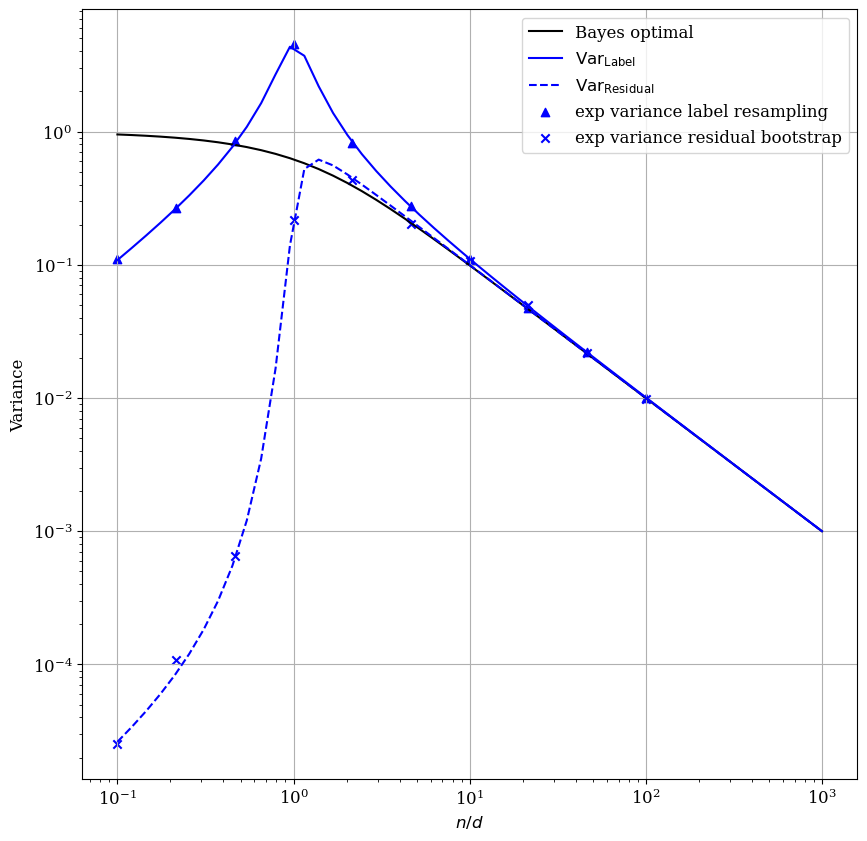

In [27]:
# VARIANCE OF THE RESAMPLING 

plt.figure(figsize=PlotSize)

# not the same notion of variance as the others as it's for fixed dataset and variance w.r.t the posterior
const_lambda_overlaps["bayes_optimal"]["variance"] = 1.0 - const_lambda_overlaps["bayes_optimal"]["q"]

plt.loglog(const_lambda_alpha_range, true_var, label="${\\rm Var}_{\\rm Full}$", c='r')
plt.loglog(const_lambda_alpha_range, hat_var_pair_bootstrap, label="${\\rm Var}_{\\rm Pair}$", linestyle='--', c='r')
# plt.loglog(const_lambda_alpha_range, hat_var_subsampling / (1.0 - p), c='g', linestyle='--', label="${\\rm Var}_{\\rm SS}, p = $" + str(p) ) # with the rescaling by 1 / (1- p)
plt.loglog(const_lambda_alpha_range, hat_var_subsampling_2 / (1.0 - p_2), c='orange', linestyle='--', label="${\\rm Var}_{\\rm SS}, p = $" + str(p_2) ) # with the rescaling by 1 / (1- p)
plt.loglog(const_lambda_alpha_range, const_lambda_overlaps["bayes_optimal"]["variance"] , c='black', label="Bayes optimal")

# plt.scatter(exp_data["full_resampling"]["alpha"], exp_data["full_resampling"]["K"] / (exp_data["full_resampling"]["K"]-1) * np.array(exp_data["full_resampling"]["var"]) , label="exp variance full resampling", c='r', marker='x')
# plt.scatter(exp_data["pair_bootstrap"]["alpha"] , exp_data["pair_bootstrap"]["K"] / (exp_data["pair_bootstrap"]["K"]-1)   * np.array(exp_data["pair_bootstrap"]["var"]) , label="exp variance pair bootstrap", c='r', marker='x')
# plt.scatter(exp_data["subsampling_099"]["alpha"], exp_data["subsampling_099"]["K"] / (exp_data["subsampling_099"]["K"]-1)   * np.array(exp_data["subsampling_099"]["var"]) / (1.0 - p), label="exp variance subsampling p=0.99", c='g', marker='x')
# plt.scatter(exp_data["subsampling_08"]["alpha"] , exp_data["subsampling_08"]["K"] / (exp_data["subsampling_08"]["K"]-1) * np.array(exp_data["subsampling_08"]["var"]) / (1.0 - p_2), label="exp variance subsampling p=0.8", c='orange', marker='x')

plt.grid()
plt.legend()

plt.xlabel("$n / d$")
plt.ylabel("Variance")

plt.show()

### 

plt.figure(figsize=PlotSize)
plt.grid()

plt.loglog(const_lambda_alpha_range, const_lambda_overlaps["bayes_optimal"]["variance"] , c='black', label="Bayes optimal")
plt.loglog(const_lambda_alpha_range, conditional_var, label="${\\rm Var}_{\\rm Label}$", c='b')
plt.loglog(const_lambda_alpha_range, hat_var_residual_bootstrap, c='b', linestyle='--', label='${\\rm Var}_{\\rm Residual}$')

plt.scatter(exp_data["label_resampling"]["alpha"]  , exp_data["label_resampling"]["K"] / (exp_data["label_resampling"]["K"]-1) * np.array(exp_data["label_resampling"]["var"]), label="exp variance label resampling", c='b', marker='^')
plt.scatter(exp_data["residual_bootstrap"]["alpha"], exp_data["residual_bootstrap"]["K"] / (exp_data["residual_bootstrap"]["K"]-1) * np.array(exp_data["residual_bootstrap"]["var"]), label="exp variance residual bootstrap", c='b', marker='x')

plt.xlabel("$n / d$")
plt.ylabel("Variance")

plt.legend()

plt.show()

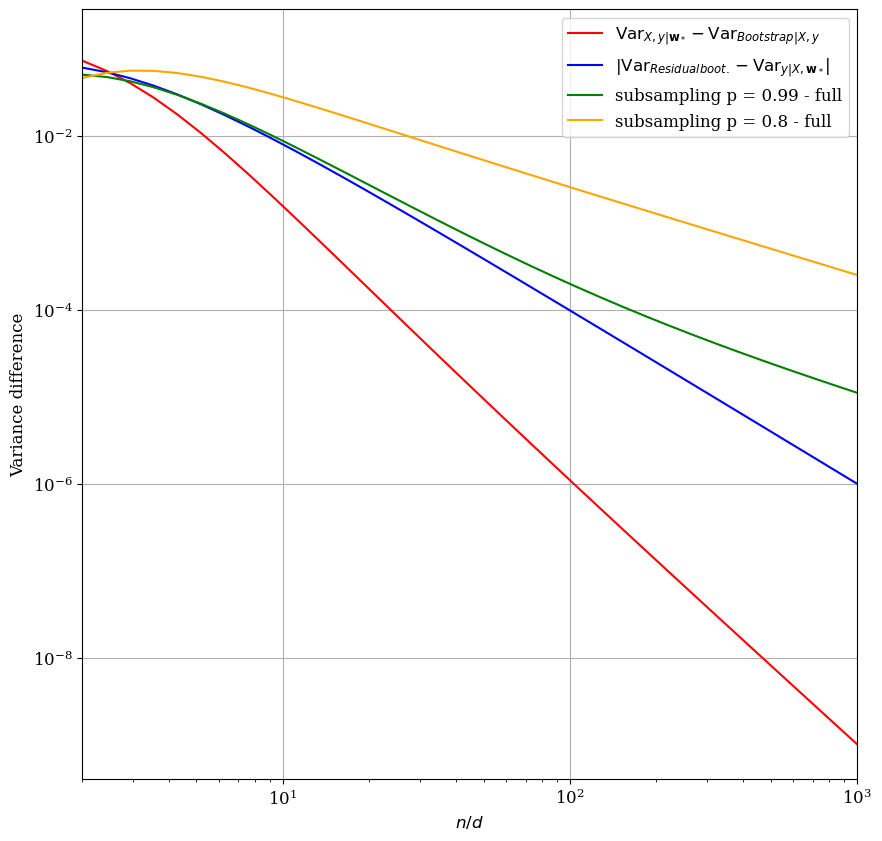

In [11]:
# plot the difference between the variances
plt.figure(figsize=PlotSize)

plt.loglog(const_lambda_alpha_range, true_var - hat_var_pair_bootstrap, label='${\\rm Var}_{X, y | \mathbf{w}_*} - {\\rm Var}_{Bootstrap | X, y}$', c='r')
plt.loglog(const_lambda_alpha_range, conditional_var - hat_var_residual_bootstrap, label = '$|{\\rm Var}_{Residual boot.} - {\\rm Var}_{y | X, \mathbf{w}_*}$|', c='b')
plt.loglog(const_lambda_alpha_range, hat_var_subsampling/ (1.0 - p) - true_var, label = f"subsampling p = {p} - full", c='g')
plt.loglog(const_lambda_alpha_range, hat_var_subsampling_2/ (1.0 - p_2) - true_var, label = f"subsampling p = {p_2} - full", c='orange')

plt.xlim( 2.0, 1e3)
plt.grid()
plt.xlabel("$n / d$")
plt.ylabel("Variance difference")
plt.legend()
